## Model Building


In [85]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [86]:
# load dataset
training_data = pd.read_csv('data/energy_training.csv')
test_data = pd.read_csv('data/energy_test.csv')

# data cleaning :
training_data = test_data.dropna()
test_data_cleaned = test_data.dropna()

In [87]:
from sklearn.preprocessing import StandardScaler

# Normaliser les données
features = training_data[['Energy_production','CO2_emission']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [88]:
# Initialisation du modèle K-Means avec des paramètres
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=42)

# Apprentissage du modèle sur les données
kmeans.fit(features_scaled)

# Prédire les clusters
clusters = kmeans.predict(features_scaled)


In [89]:
sil_score = silhouette_score(features_scaled, clusters)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.9818745280994102


C:\Users\boula\AppData\Local\Temp\ipykernel_19892\2677769208.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data['Energy_type_encoded'] = LabelEncoder().fit_transform(training_data['Energy_type'])
C:\Users\boula\AppData\Local\Temp\ipykernel_19892\2677769208.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


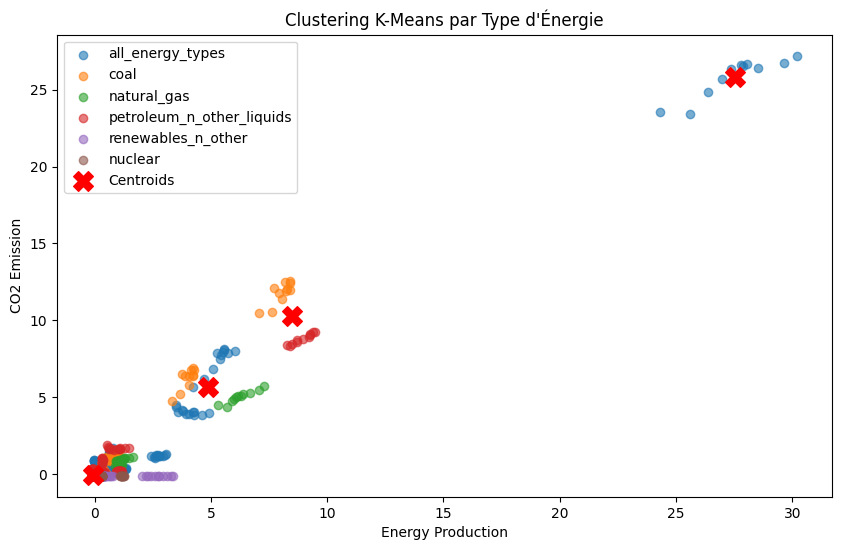

In [90]:
from sklearn.preprocessing import LabelEncoder

# Encodage du type d'énergie
training_data['Energy_type_encoded'] = LabelEncoder().fit_transform(training_data['Energy_type'])
energy_types = training_data['Energy_type'].unique()

# Création d'une figure pour la visualisation
plt.figure(figsize=(10, 6))

# Affichage des clusters avec le type d'énergie
for energy_type in energy_types:
    mask = training_data['Energy_type'] == energy_type
    plt.scatter(
        features_scaled[mask, 0], features_scaled[mask, 1], 
        label=energy_type, cmap='viridis', alpha=0.6
    )

# Affichage des centres des clusters
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=200, c='red', label='Centroids', marker='X'
)

plt.title('Clustering K-Means par Type d\'Énergie')
plt.xlabel('Energy Production')
plt.ylabel('CO2 Emission')
plt.legend()
plt.show()